<a href="https://colab.research.google.com/github/michelleruas/Data_Visualisation/blob/master/Python_For_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib
from bs4 import BeautifulSoup
import sklearn as sk
import numpy as np

In [53]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader("TSLA", 'yahoo', start, end)
print(df.head())
df.to_csv("tsla")


             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


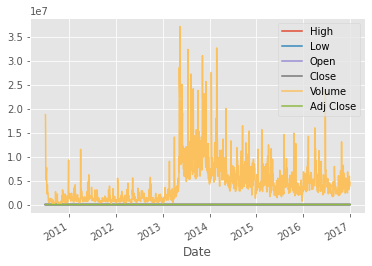

In [54]:
df = pd.read_csv('tsla', parse_dates=True, index_col = 0)
df.plot()
plt.show()

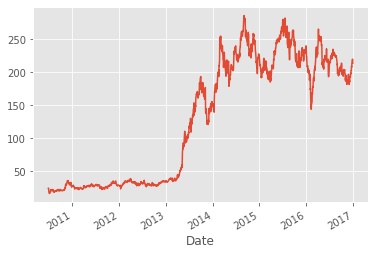

In [55]:
df['Adj Close'].plot()

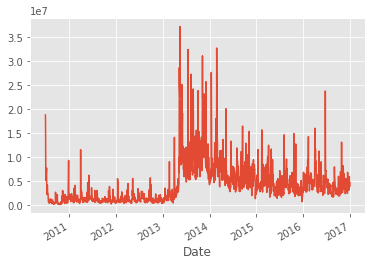

In [56]:
df['Volume'].plot()

In [57]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods = 0).mean()


In [58]:
print(df.tail())

                  High         Low        Open  ...   Volume   Adj Close     100ma
Date                                            ...                               
2016-12-23  213.449997  207.710007  208.000000  ...  4670500  213.339996  202.6190
2016-12-27  222.250000  214.419998  214.880005  ...  5915700  219.529999  202.5082
2016-12-28  223.800003  217.199997  221.529999  ...  3782500  219.740005  202.4053
2016-12-29  219.199997  214.119995  218.559998  ...  4045000  214.679993  202.2905
2016-12-30  217.500000  211.679993  216.300003  ...  4642600  213.690002  202.1366

[5 rows x 7 columns]


In [59]:
#Removes entire rows of data where the 100 moving average was NaN (first 100 days)
df.dropna(inplace=True)

In [60]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


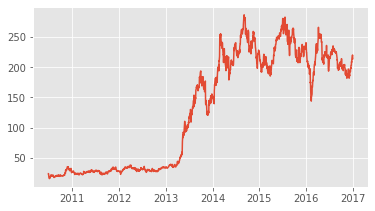

In [61]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['Adj Close'])

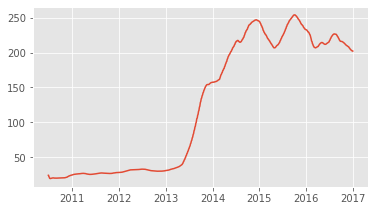

In [62]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['100ma'])

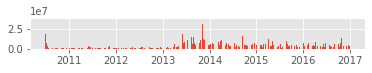

In [63]:
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1)
ax2.bar(df.index, df['Volume'])
plt.show()

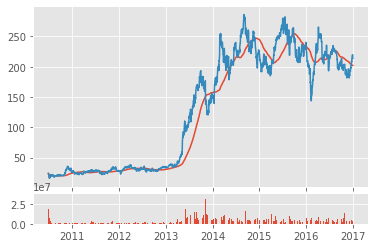

In [64]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['Adj Close'])
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1)
ax2.bar(df.index, df['Volume'])
plt.show()

## 4. Resampling and Candle Stick Graphs

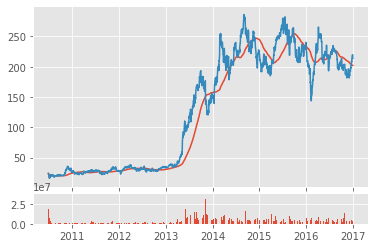

In [65]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['Adj Close'])
ax2.bar(df.index, df['Volume'])
plt.show()
#Resampling is when you take information and resample to the frame that you want. e.g. WE have daily data and we are going to resample to ten day data


In [66]:
#OHLC is open, high, low, close
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc)
print(df_volume)

                  open        high         low       close
Date                                                      
2010-06-29   23.889999   23.889999   15.800000   17.459999
2010-07-09   17.400000   20.639999   17.049999   20.639999
2010-07-19   21.910000   21.910000   20.219999   20.719999
2010-07-29   20.350000   21.950001   19.590000   19.590000
2010-08-08   19.600000   19.600000   17.600000   19.150000
...                ...         ...         ...         ...
2016-11-14  181.449997  193.139999  181.449997  193.139999
2016-11-24  196.649994  196.649994  181.470001  181.470001
2016-12-04  186.800003  198.149994  185.850006  198.149994
2016-12-14  198.690002  213.339996  197.580002  213.339996
2016-12-24  219.529999  219.740005  213.690002  213.690002

[238 rows x 4 columns]
Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
                ...   
2016-11-14    38842300
2016-11-24    24050400
2016-12-04    281051

In [66]:
pip install mpl_finance

In [67]:

import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc

In [68]:
df_ohlc.reset_index(inplace=True)

In [69]:
df_ohlc['Date']= df_ohlc['Date'].map(mdates.date2num)

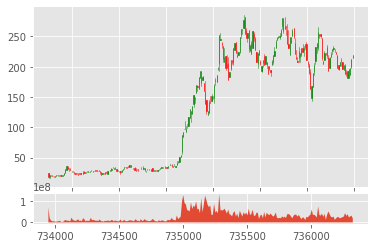

In [70]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width =2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

## 5. Automating S&P 500 Data Collection

Web scraping using BeautifulSoup

In [71]:
#Beautiul Soup
#Pickle lets you save any object
import bs4 as bs
import pickle
import requests

In [72]:
def save_sp500_tickers():
  resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, "lxml")
  table = soup.find('table', {"class": "wikitable sortable"})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

  with open('sp500tickers.pickle', "wb") as f:
    pickle.dump(tickers,f)
  print(tickers)
  return tickers

In [73]:
save_sp500_tickers()

['MMM\n', 'ABT\n', 'ABBV\n', 'ABMD\n', 'ACN\n', 'ATVI\n', 'ADBE\n', 'AMD\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALXN\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'ANTM\n', 'AON\n', 'AOS\n', 'APA\n', 'AIV\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BLL\n', 'BAC\n', 'BK\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'BIIB\n', 'BLK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BF.B\n', 'CHRW\n', 'COG\n', 'CDNS\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CTL\n', 'CERN\n', 'CF\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'CI\n', 'CINF\n', 'CTAS\n', 'C

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\n',
 'CTL\n',
 'CERN\

In [74]:
pip install lxml

In [75]:
import datetime as dt
import os 
import pandas as pd
import pandas_datareader.data as web


In [76]:
def get_data_from_yahoo(reload_sp500=false):
  if reload_sp500:
    tickers = save_sp500_tickers()
  else:
    with open('sp500tickers.pickle', "rb") as f:
      tickers = pickle.load(f)


NameError: ignored